In [39]:
using SeisPlot, SeisReconstruction, SeisProcessing
using  PyPlot, LinearAlgebra, FFTW, DSP, Statistics, LinearAlgebra

In [41]:
dt=0.002; # dt 
nt=512; #number of simples in time dimension
nx1=64; # number of samples in x1 dimension
nx2=64; # number of samples in x2 dimension
dx1=10.0; 
dx2=10.0;
f0= 25.0; # dominant frequency for the wavelet
tau=[0.256, 0.512, 0.768]; # t0 for the events
amp=[1.0, 0.5, -1.0]; # amplitude 
p2=[0.3,0.0, -0.45] ; # ray parameter dimension 1
p1=[0.15,0.0, -0.15]; # ray paramteter dimension2 


In [42]:

data=SeisParabEvents( tau=tau,amp=amp, p2=p2,p1=p1, dt=dt, nt=nt, dx1=dx1, nx1=nx1, dx2=dx2, nx2=nx2, f0=f0);

nt,nr,ns=size(data);

d_obs =(10^9)*copy(data); # scale



In [43]:
d_obsn= SeisAddNoise(d_obs, 1.0, db=false, L=9);


In [66]:
d_obsn=SeisDecimate(d_obsn;mode="random",perc=10);

sys:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.


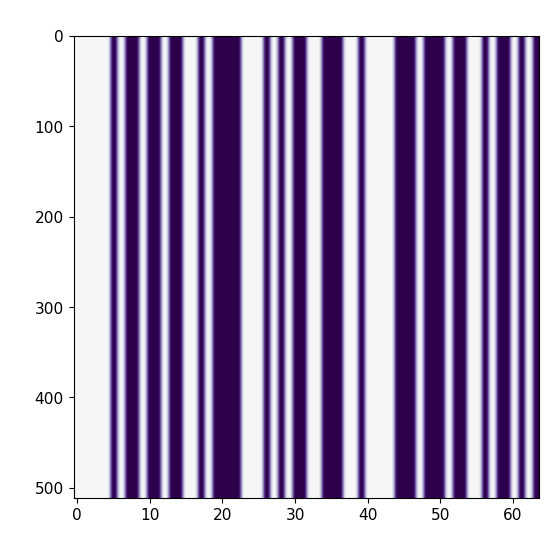

In [73]:
SeisPlotTX(S[:,:,32]);gcf()

In [67]:
S = CalculateSampling(d_obsn)
μ= 0.1;
tolout=1.e-8;
x0 = randn(Float64,size(d_obs));
operators=[ WeightingOp, FFTOp];
parameters= [Dict(:w =>S), Dict( :normalize=>true)];
m, J = FISTA(x0,d_obsn,operators,parameters, μ=μ,Ni=50,tolerance=tol);


 Fast Iterative Soft Thresholding Algorithm (FISTA)


 k          ||y-Ax||²₂                ||x||₁               μ              J/J0
  0     0.0000000000e+00     0.0000000000e+00     1.0000000000e-01     1.0000000000e+00
  1     1.2258120324e+20     1.3932500994e+14     1.0000000000e-01     1.2500002984e-03
  2     3.0645307777e+17     1.4629126041e+14     1.0000000000e-01     3.1252991017e-06
  3     1.4519243734e+16     1.4673771118e+14     1.0000000000e-01     1.4835667150e-07
  4     4.2657367012e+14     1.4667158434e+14     1.0000000000e-01     4.6490405962e-09
  5     2.6195678830e+12     1.4665683314e+14     1.0000000000e-01     3.2581397094e-10
  6     5.5919466000e+11     1.4665740977e+14     1.0000000000e-01     3.0480485754e-10
  7     8.4676348114e+07     1.4665789888e+14     1.0000000000e-01     2.9910443048e-10
  8     6.1860553418e+08     1.4665792138e+14     1.0000000000e-01     2.9910992101e-10
  9     5.7964925777e+06     1.4665790643e+14     1.0000000000e-01     2.9

In [50]:
S = CalculateSampling(d_obsn)

ρ=1.0;
μ= 10.0;
tolout=1.e-8;
x0 = randn(Float64,size(d_obs));
operators=[ WeightingOp, FFTOp];
parameters= [Dict(:w =>S), Dict( :normalize=>true)];
m, J= ADMM(x0,d_obsn,operators,parameters, ρ= ρ , μ=μ, Ne=100, Ni=100,tolin=1e-4, tolout=tolout);


 k          ||y-Ax||²₂                ||x||₁               μ              J/J0
  0     0.0000000000e+00     0.0000000000e+00     1.0000000000e+01     1.0000000000e+00
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  1     1.3447899500e+22     7.6248315469e+13     1.0000000000e+01     1.2500002835e-01
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  2     3.3619752561e+21     1.1437248111e+14     1.0000000000e+01     3.1250028350e-02
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  3     8.4049400466e+20     1.3343456264e+14     1.0000000000e+01     7.8125283495e-03
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  4     2.1012359648e+20     1.4296560211e+14     1.0000000000e+01     1.9531533495e-03
Nested iteration i= 1
CGLS convergence reached at k= 1 iterations.
  5     5.2530946774e+19     1.4773112055e+14     1.0000000000e+01     4.8830959953e-04
Nested iteration i= 1
CGLS convergence reached at k= 1 it

In [69]:
drec=real(FFTOp(m,false,normalize=true))

512×64×64 Array{Float64, 3}:
[:, :, 1] =
 -0.440285   -4.87968e7  -2.87904e7  …  -4.3274       3.16948     1.74722
 -0.809111   -8.45706e7   2.56606e7      0.75278      0.0260267   0.078325
  1.58235    -1.20815e8   9.121e7        0.659502     0.0100024   0.154383
 -0.305799   -1.51171e8   1.40481e8      0.566623    -0.671434    2.75297
  0.372332   -1.69521e8   1.26182e8      0.141787     2.02902    -0.905761
 -2.2709     -1.8807e8    7.0959e7   …   0.803332    -1.12252    -0.269057
  0.0142426  -2.31987e8   3.65978e7      2.63277     -3.05863     0.235959
  0.196883   -3.08109e8   2.08726e7     -2.60864      2.14723     0.674961
 -0.475527   -3.70344e8   4.91312e6      0.235391    -3.1686     -0.132753
 -1.27272    -3.73469e8   1.52762e7     -0.00586147   0.743872   -1.26154
  ⋮                                  ⋱                           
 -0.991021    1.01776e8  -1.78294e7     -0.318634     1.57256     1.31195
 -1.7335      2.19762e8  -1.07529e8      2.69466     -0.400702    0.5660

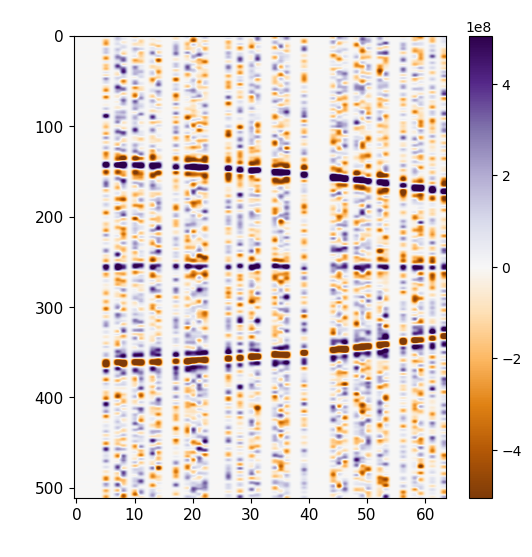

In [70]:
SeisPlotTX(drec[:,:,32]); colorbar(); gcf()

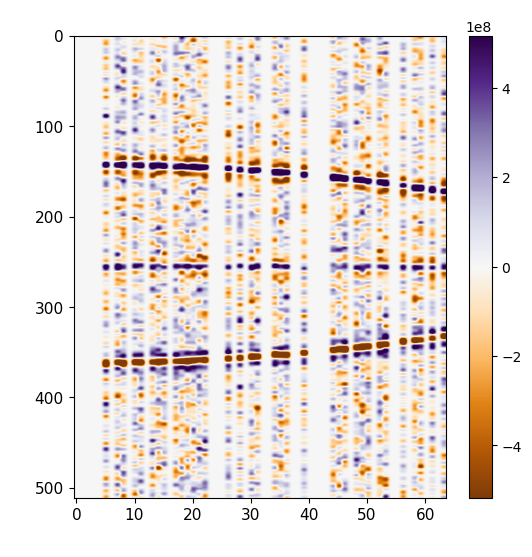

In [59]:
SeisPlotTX(d_obsn[:,:,32]); colorbar(); gcf()